# 회귀분석 (Regression)
1. 상관분석 (Correlation analysis)
2. 단순선형회귀모형 (Simple linear regression)
3. 중회귀모형 (Multiple linear regression)
4. 잔차분석 (Residual analysis)
5. 범주형 독립변수

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# matplotlib 설정
plt.rc('font', family = 'AppleGothic')   # Mac
# plt.rc('font', family = 'Malgun Gothic')   # Windows
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 1. 상관분석 (Correlation analysis)
- 두 연속형 변수 사이의 연관성에 관한 추론

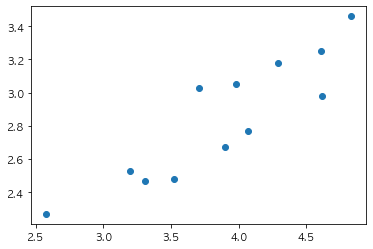

In [2]:
# 데이터 생성
x = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 산점도
plt.scatter(x, y)
plt.show()

### 상관계수 계산

In [3]:
# 공분산 행렬 계산
cov = np.cov(x, y)
cov

array([[0.43937273, 0.21775455],
       [0.21775455, 0.13535455]])

In [4]:
cov[0, 1] / (np.sqrt(cov[0, 0]) * np.sqrt(cov[1, 1]))

0.8929235125385305

### 상관계수 계산(내장함수 이용)
- `np.corrcoef(x, y)` : 상관계수 행렬 계산

In [5]:
np.corrcoef(x, y)

array([[1.        , 0.89292351],
       [0.89292351, 1.        ]])

In [7]:
corr_coef = np.corrcoef(x, y)[0, 1]
corr_coef

0.8929235125385305

## 산점도를 통한 상관관계

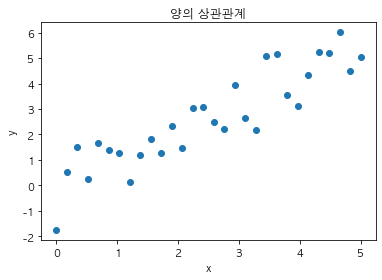

In [8]:
# 양의 상관관계
np.random.seed(100)
x = np.linspace(0, 5, 30)
y = x + np.random.randn(30)

# 산점도
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("양의 상관관계")
plt.show()

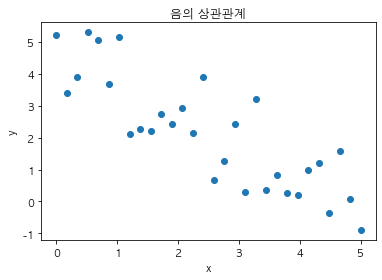

In [9]:
# 음의 상관관계
y = -np.sort(-x) + np.random.randn(30)

# 산점도
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("음의 상관관계")
plt.show()

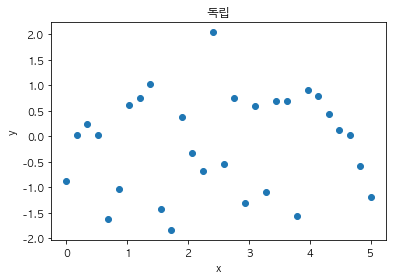

In [10]:
# 독립
y = np.random.randn(30)

# 산점도
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("독립")
plt.show()

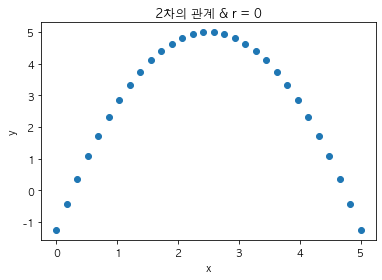

In [11]:
# 2차의 관계 & r = 0
y = -(x-2.5)**2 + 5

# 산점도
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2차의 관계 & r = 0")
plt.show()

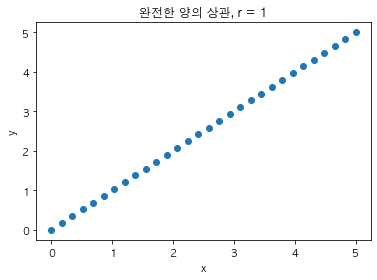

In [12]:
# 완전한 양의 상관, r = 1
y = x

# 산점도
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("완전한 양의 상관, r = 1")
plt.show()

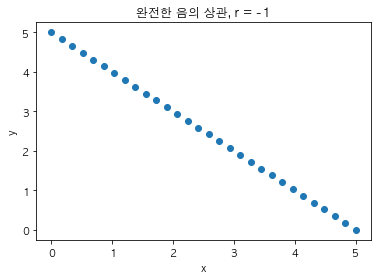

In [13]:
# 완전한 음의 상관, r = -1
y = -np.sort(-x)

# 산점도
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("완전한 음의 상관, r = -1")
plt.show()

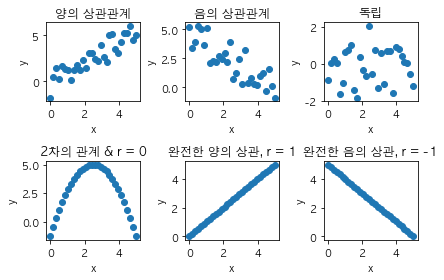

In [14]:
np.random.seed(100)

# 양의 상관관계
plt.subplot(231)
x = np.linspace(0, 5, 30)
y = x + np.random.randn(30)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("양의 상관관계")

# 음의 상관관계
plt.subplot(232)
y = -np.sort(-x) + np.random.randn(30)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("음의 상관관계")

# 독립
plt.subplot(233)
y = np.random.randn(30)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("독립")

# 2차의 관계 & r = 0
plt.subplot(234)
y = -(x-2.5)**2 + 5
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2차의 관계 & r = 0")

# 완전한 양의 상관, r = 1
plt.subplot(235)
y = x
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("완전한 양의 상관, r = 1")

# 완전한 음의 상관, r = -1
plt.subplot(236)
y = -np.sort(-x)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("완전한 음의 상관, r = -1")

plt.tight_layout()
plt.show()

## 상관계수 검정
- $H_0: \rho = 0$ vs $H_1: \rho > 0$
- 검정통계량 $T = \frac{\sqrt{n-2}r}{\sqrt{1-r^2}} \sim t_{n-2}$
- `stats.pearsonr(x, y)`

#### 키(x)와 몸무게(y) 사이에 상관관계가 있는지 알고 싶다.

In [15]:
x = [172, 165, 157, 175, 155, 168, 170, 176, 162, 171]
y = [63, 66, 56, 70, 55, 59, 60, 75, 53, 68]

# 상관계수 검정
corr, p_value = stats.pearsonr(x, y)

# 검정통계량 계산
test_stat = np.sqrt(len(x) - 2)*corr / np.sqrt(1 - corr**2)

print("======= 상관계수 검정 결과 =======")
print("상관계수: {}".format(round(corr, 3)))
print("검정통계량: {}".format(round(test_stat, 3)))
print("p-value: {}".format(round(p_value, 3)))

======= 상관계수 검정 결과 =======
상관계수: 0.819
검정통계량: 4.04
p-value: 0.004


p-value = 0.004/2 < 0.05이기 때문에 유의수준 0.05하에서 귀무가설을 기각한다.
따라서 키와 몸무게에는 선형적인 상관관계가 있다.

# 2. 단순선형회귀모형 (Simple linear regression)
$$y_i = \alpha + \beta x_i + \epsilon_i, ~~ i=1,\dots, n$$
- $\alpha, ~~ \beta$ : 회귀모수 ($\alpha$: 상수항, $\beta$ : 기울기)
- $x_1, \dots, x_n$ : 설명변수 (독립변수)
- $y_1, \dots, y_n$ : 반응변수 (종속변수)
- $\epsilon_1, \dots, \epsilon_n$ : 서로 독립인 $N(0, \sigma^2)$인 확률변수 (오차항)

### 광고시간(x; 분)이 판매율(y; %)에 선형적인 영향을 주는지 알고 싶다.

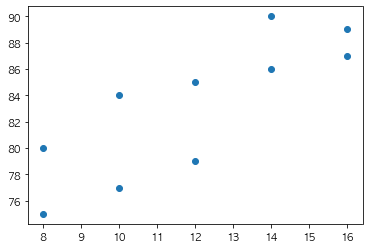

In [16]:
x = np.array([8, 8, 10, 10, 12, 12, 14, 14, 16, 16])
y = np.array([75, 80, 84, 77, 79, 85, 86, 90, 87, 89])

plt.scatter(x, y)
plt.show()

## 회귀모형 적합하기
1. scikit-learn
2. statsmodels

### 1. scikit-learn 라이브러리 이용

In [17]:
x

array([ 8,  8, 10, 10, 12, 12, 14, 14, 16, 16])

In [18]:
x.reshape(-1, 1)

array([[ 8],
       [ 8],
       [10],
       [10],
       [12],
       [12],
       [14],
       [14],
       [16],
       [16]])

In [19]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
print(model.intercept_, model.coef_)

66.10000000000001 [1.425]


#### 최소제곱법으로 계산한 회귀직선
$$
\begin{align}
\hat y &= \hat\alpha + \hat\beta x \\
       &= 66.10 + 1.425x 
\end{align}
$$

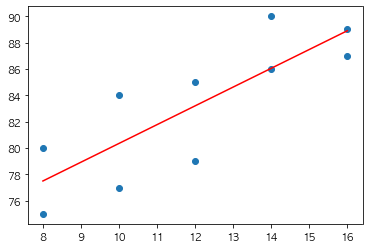

In [20]:
# 회귀직선 계산
fitted_line = model.intercept_ + model.coef_[0]*X

plt.scatter(x, y)
plt.plot(x, fitted_line, color = "red")
plt.show()

### 2. statsmodels 라이브러리 이용
- `sm.OLS()` : numpy array로 적합할 때
- `sm.OLS.from_formula()` : 데이터프레임으로 formula를 이용할 때

In [21]:
X

array([[ 8],
       [ 8],
       [10],
       [10],
       [12],
       [12],
       [14],
       [14],
       [16],
       [16]])

In [22]:
import statsmodels.api as sm

# 다음과 같이 형태를 변환해주어야 함
X_1 = sm.add_constant(X)
X_1

array([[ 1.,  8.],
       [ 1.,  8.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 16.],
       [ 1., 16.]])

In [23]:
# 회귀분석 적합
model = sm.OLS(y, X_1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     16.85
Date:                Mon, 12 Jul 2021   Prob (F-statistic):            0.00342
Time:                        07:45:41   Log-Likelihood:                -24.405
No. Observations:                  10   AIC:                             52.81
Df Residuals:                       8   BIC:                             53.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.1000      4.281     15.442      0.0

/Users/hyunsung/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### `sm.OLS.from_formula`

In [24]:
# 데이터프레임 이용
df = pd.DataFrame({
    "y": y,
    "x": x
})
df

,y,x
0,75,8
1,80,8
2,84,10
3,77,10
4,79,12
5,85,12
6,86,14
7,90,14
8,87,16
9,89,16


In [25]:
# 회귀분석 적합
model = sm.OLS.from_formula("y ~ x", data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     16.85
Date:                Mon, 12 Jul 2021   Prob (F-statistic):            0.00342
Time:                        07:48:55   Log-Likelihood:                -24.405
No. Observations:                  10   AIC:                             52.81
Df Residuals:                       8   BIC:                             53.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.1000      4.281     15.442      0.0

/Users/hyunsung/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 회귀분석 결과에 대한 해석

- $\hat\alpha = 66.1, ~~\hat\beta = 1.425$ 이고 따라서 추정된 회귀식은 $\hat y = 66.1 + 1.425 x$ 이다.

- x가 1단위 증가하면, y는 1.425 증가한다. 다시 말해, 광고시간이 1분 증가하면 판매율은 1.425% 증가한다고 할 수 있다.

- 또한 광고시간이 11분일 때, 예측되는 판매율은 $66.1 + 1.425\times 11 = 81.775$%이다.

- 결정계수 $R^2 = 0.678$로 총 변동 중 회귀모형에 의해 설명되는 비율은 약 67.8%이다.

### 회귀계수 $\beta$에 대한 추론 (t-검정)

- $H_0: \beta = 0$ vs $H_1: \beta \ne 0$

- $\hat\beta = 1.425$ 이고 p-value = 0.003 < 0.05 이기 때문에 유의수준 0.05 하에서 귀무가설을 기각한다. (기울기의 효과가 유의미하다.)

### 회귀모형에 대한 추론 (F-검정)

- $H_0: \beta = 0$ vs $H_1: \beta \ne 0$

- 아래 분산분석표로부터 p-value = 0.003 < 0.05 이기 때문에 유의수준 5%에서 회귀모형이 유의하다.

- 단순선형회귀에서는 회귀계수에 대한 유의성 검정과 회귀모형의 유의성 검정이 동일

In [26]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,162.45,162.45000,16.845107,0.003418
Residual,8.0,77.15,9.64375,NaN,NaN


## 모형으로부터 결과값 가져오기

### 회귀계수 추정값

In [27]:
result.params

Intercept    66.100
x             1.425
dtype: float64

### 회귀직선 추정

In [28]:
# 또는 fittedvalues에서 추정값을 가져와도 됨
result.fittedvalues

0    77.50
1    77.50
2    80.35
3    80.35
4    83.20
5    83.20
6    86.05
7    86.05
8    88.90
9    88.90
dtype: float64

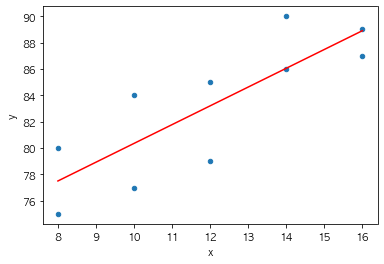

In [29]:
# 산점도와 추정된 회귀직선
df.plot.scatter(x = "x", y = "y")
plt.plot(x, result.fittedvalues, color = "red")
plt.show()

## 새로운 값에 대해 예측

In [30]:
# predict 함수로 새로운 값에 대해 예측할 수 있음
result.predict(df.x)

0    77.50
1    77.50
2    80.35
3    80.35
4    83.20
5    83.20
6    86.05
7    86.05
8    88.90
9    88.90
dtype: float64

In [31]:
result.predict({"x": 11})

0    81.775
dtype: float64